# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [95]:
import pandas as pd
import numpy as np 

from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from plotnine import *

In [96]:
df = load_penguins()
df.dropna(inplace=True)

In [97]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [98]:
df['species'] = LabelEncoder().fit_transform(df['species'])

In [99]:
X = df.drop(['species'],axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 256)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

ChatGPT was used to debug the following code

In [ ]:
def analysis(modelName,pri = None,species_index=0): 
   # Fit the model
    ct = ColumnTransformer(
    transformers=[
        ('standardize', StandardScaler(),['bill_length_mm','flipper_length_mm','body_mass_g']),
        ('encoding',OneHotEncoder(drop='first'),['island','sex'])
    ], remainder='passthrough'
)
    model =  Pipeline(
        steps= [
            ('columnTransforme', ct),
            ('Model',modelName)
        ]
    )
    model.fit(X_train,y_train)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) 
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_proba, multi_class="ovr") 

    # Compute false positive rate (FPR) and true positive rate (TPR)
    fpr, tpr, _ = roc_curve(y_test == species_index, y_proba[:, species_index])
    
    # Create a DataFrame for plotting
    roc_data = pd.DataFrame({
        'FPR': fpr,
        'TPR': tpr
    })

    # Create the ROC plot using plotnine
    if pri == 'plotROC':
        roc_plot = (
            ggplot(roc_data, aes(x='FPR', y='TPR')) +
            geom_line(color="blue", size=1) +
            geom_abline(intercept=0, slope=1, linetype="dashed", color="red") +
            labs(
                x="False Positive Rate",
                y="True Positive Rate",
                title=f"ROC Curve for Species Adelie"
            ) +
            theme_minimal()
        )
        display(roc_plot)

    # Return results
    return {
        "Confusion Matrix": cm,
        "Accuracy": accuracy,
        "Classification Report": pd.DataFrame(report).transpose(),
        "AUC": auc,
    }

In [101]:
def results(model):
    print("Confusion Matrix:\n", model["Confusion Matrix"])
    print("\nAccuracy:", model["Accuracy"])
    print("\nClassification Report:\n", model["Classification Report"])
    print("\nAUC:", model["AUC"])

In [102]:
knn_5 =KNeighborsClassifier(n_neighbors=5)
knn_10 =KNeighborsClassifier(n_neighbors=10)

dt_3 = DecisionTreeClassifier(max_depth=3)
dt_20 = DecisionTreeClassifier(max_depth=20)

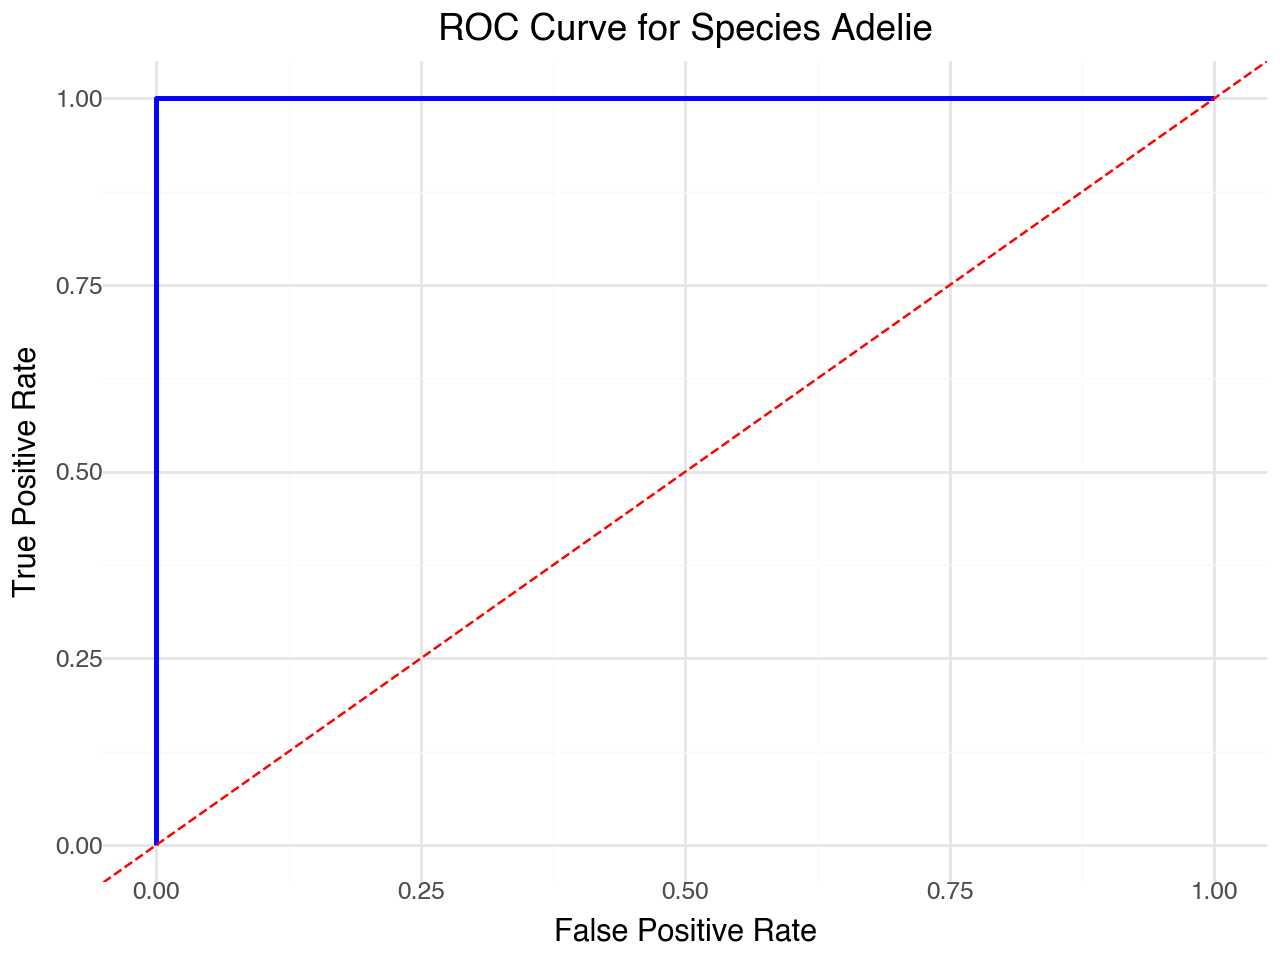

Confusion Matrix:
 [[29  0  0]
 [ 1 13  0]
 [ 0  0 24]]

Accuracy: 0.9850746268656716

Classification Report:
               precision    recall  f1-score    support
0              0.966667  1.000000  0.983051  29.000000
1              1.000000  0.928571  0.962963  14.000000
2              1.000000  1.000000  1.000000  24.000000
accuracy       0.985075  0.985075  0.985075   0.985075
macro avg      0.988889  0.976190  0.982005  67.000000
weighted avg   0.985572  0.985075  0.984925  67.000000

AUC: 1.0


In [103]:
knn_5_result = analysis(knn_5,'plotROC')
results(knn_5_result)

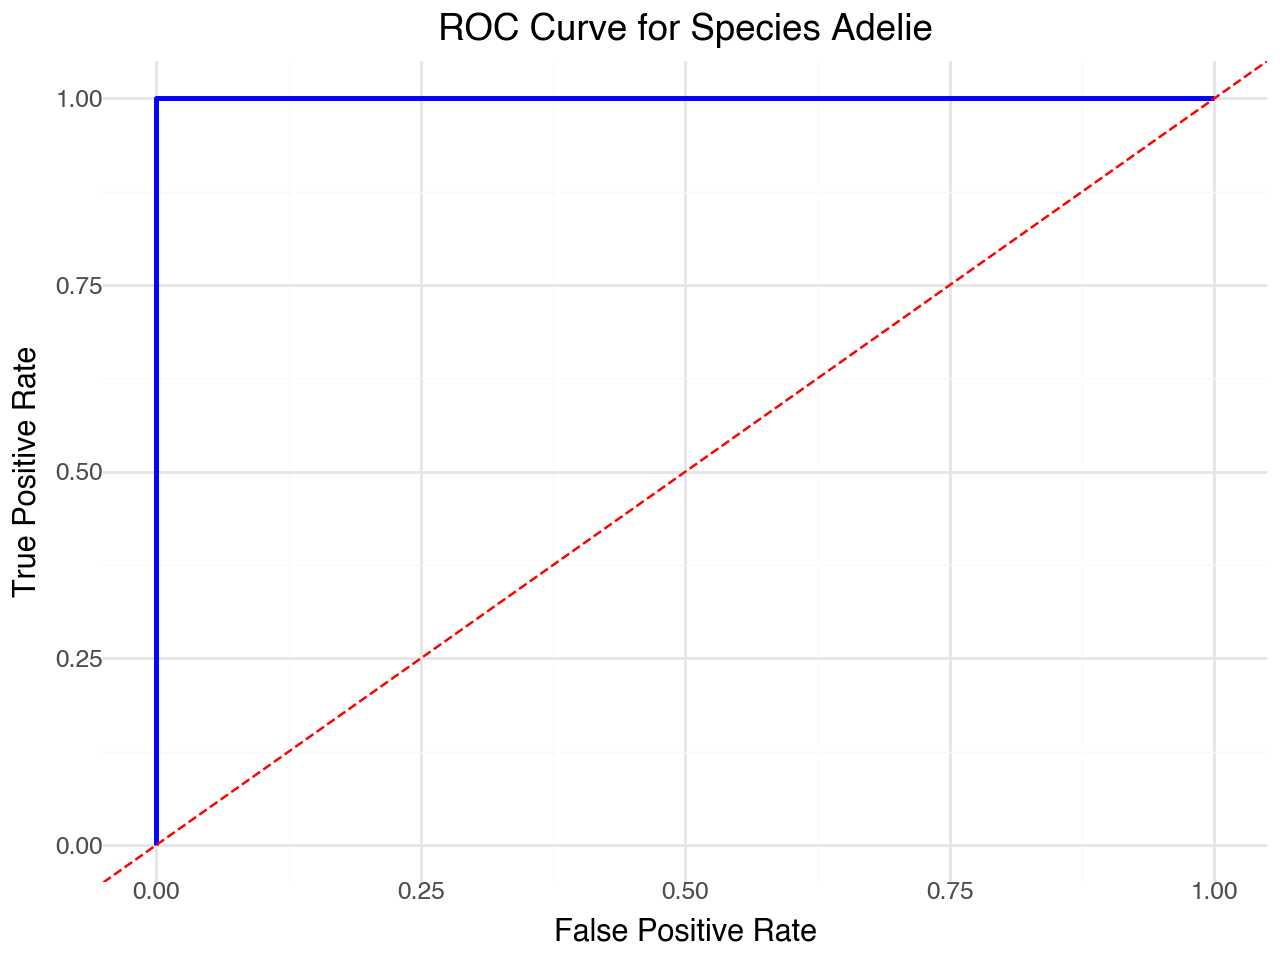

Confusion Matrix:
 [[29  0  0]
 [ 2 12  0]
 [ 0  0 24]]

Accuracy: 0.9701492537313433

Classification Report:
               precision    recall  f1-score    support
0              0.935484  1.000000  0.966667  29.000000
1              1.000000  0.857143  0.923077  14.000000
2              1.000000  1.000000  1.000000  24.000000
accuracy       0.970149  0.970149  0.970149   0.970149
macro avg      0.978495  0.952381  0.963248  67.000000
weighted avg   0.972075  0.970149  0.969499  67.000000

AUC: 1.0


In [104]:
knn_10_result = analysis(knn_10,'plotROC')
results(knn_10_result)

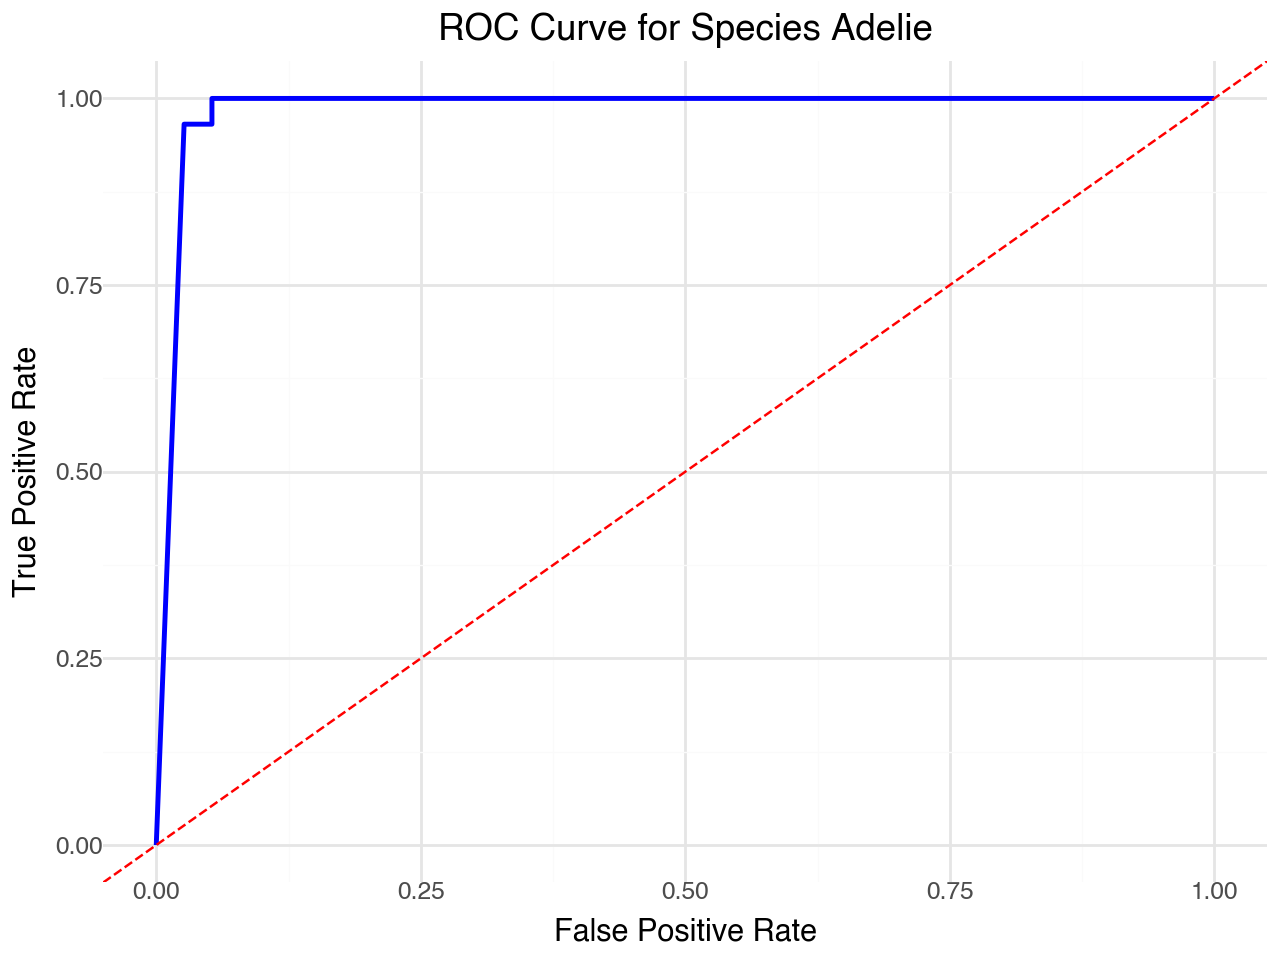

Confusion Matrix:
 [[29  0  0]
 [ 2 12  0]
 [ 0  0 24]]

Accuracy: 0.9701492537313433

Classification Report:
               precision    recall  f1-score    support
0              0.935484  1.000000  0.966667  29.000000
1              1.000000  0.857143  0.923077  14.000000
2              1.000000  1.000000  1.000000  24.000000
accuracy       0.970149  0.970149  0.970149   0.970149
macro avg      0.978495  0.952381  0.963248  67.000000
weighted avg   0.972075  0.970149  0.969499  67.000000

AUC: 0.9832555526747905


In [105]:
dt_3_result = analysis(dt_3,'plotROC')
results(dt_3_result)

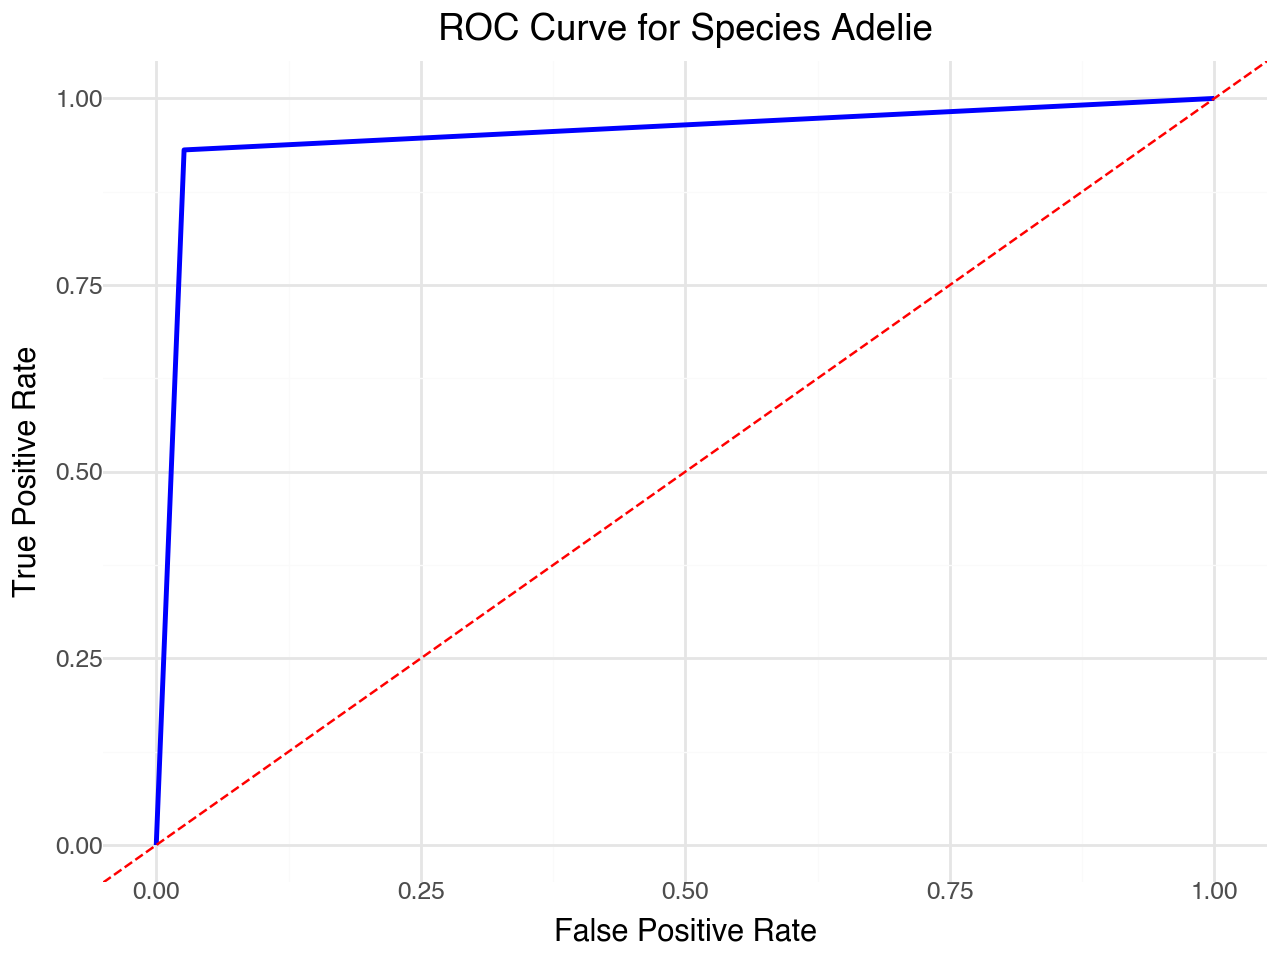

Confusion Matrix:
 [[27  1  1]
 [ 1 13  0]
 [ 0  0 24]]

Accuracy: 0.9552238805970149

Classification Report:
               precision    recall  f1-score    support
0              0.964286  0.931034  0.947368  29.000000
1              0.928571  0.928571  0.928571  14.000000
2              0.960000  1.000000  0.979592  24.000000
accuracy       0.955224  0.955224  0.955224   0.955224
macro avg      0.950952  0.953202  0.951844  67.000000
weighted avg   0.955288  0.955224  0.954983  67.000000

AUC: 0.9651943972290957


In [106]:
dt_20_result = analysis(dt_20,"plotROC")
results(dt_20_result)